# Rock type pokemon prediction

Pokemon (also known as Pocket Monsters) is a video game series produced in Japan by GameFreak. First published in 1996 game was huge succes and start of huge franchise. In Pokemon world creatures have different types. Fire, water, grass and many others. Every Pokemon has it's unique stats describing it's species: HP - Health, Attack - physical attack strength, Defense - resistance for physical attacks, Sp.Atk - elemental attack strength, Sp.Def - resistance for elemental attacks and Speed - how quickly it attacks. 

## Goal

In this project I'll try to predict with at least 70% accuracy wheter pokemon is rock type.

## About the dataset

This dataset comes from Kaggle (https://www.kaggle.com/abcsds/pokemon)

The data as described by Myles O'Neill is:

* #: ID for each pokemon
* Name: Name of each pokemon
* Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
* Type 2: Some pokemon are dual type and have 2
* Total: sum of all stats that come after this, a general guide to how strong a pokemon is
* HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
* Attack: the base modifier for normal attacks (eg. Scratch, Punch)
* Defense: the base damage resistance against normal attacks
* SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
* SP Def: the base damage resistance against special attacks
* Speed: determines which pokemon attacks first each round

## Importing libraries:

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

## Reading data from csv file:

In [30]:
df = pd.read_csv("./data/Pokemon.csv")

In [31]:
df.shape

(800, 13)

In [32]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


We can observe whole pokedex here. There is a little bit too much data for our machine learning algorithms right now.

## Molding data:

In [129]:
df = pd.read_csv("./data/Pokemon.csv")
del df["#"] # Pokedex number is unnecesary
del df["Name"] # Name will not be needed as it is totally random
del df["Generation"] # We're treating Pokemon World as a whole, no generations
del df["Legendary"] # We're treating each pokemon as it's own species, therefore rarity is not needed
del df["Total"] # Total is a sum of stats

#This line determines wheter or not a pokemon is rock type
df["Is Rock?"] = (df["Type 1"] == "Rock") | (df["Type 2"] == "Rock")

#These two lines change True to 1 and False to 1
is_rock_map = {True : 1, False : 0}
df["Is Rock?"] = df["Is Rock?"].map(is_rock_map)

del df["Type 1"]
del df["Type 2"] # These types are not needed anymore
df

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Is Rock?
0,45,49,49,65,65,45,0
1,60,62,63,80,80,60,0
2,80,82,83,100,100,80,0
3,80,100,123,122,120,80,0
4,39,52,43,60,50,65,0
...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,1
796,50,160,110,160,110,110,1
797,80,110,60,150,130,70,0
798,80,160,60,170,130,80,0


Much better! With this table we can clearly see each pokemon as instance of stats and wheter pokemon is rock type or not.

## Checking dataframe
### Checking for null values
First of all I will check wheter this dataframe has missing values and is correct.

In [130]:
df.isnull().values.any()

False

### Checking for missing values

In [131]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing HP stats: {0}".format(len(df.loc[df["HP"] == 0])))
print("# rows missing Attack stats: {0}".format(len(df.loc[df["Attack"] == 0])))
print("# rows missing Defense stats: {0}".format(len(df.loc[df["Defense"] == 0])))
print("# rows missing Sp. Atk stats: {0}".format(len(df.loc[df["Sp. Atk"] == 0])))
print("# rows missing Sp. Def stats: {0}".format(len(df.loc[df["Sp. Def"] == 0])))
print("# rows missing Speed stats: {0}".format(len(df.loc[df["Speed"] == 0])))

# rows in dataframe 800
# rows missing HP stats: 0
# rows missing Attack stats: 0
# rows missing Defense stats: 0
# rows missing Sp. Atk stats: 0
# rows missing Sp. Def stats: 0
# rows missing Speed stats: 0


### Checking for correlation

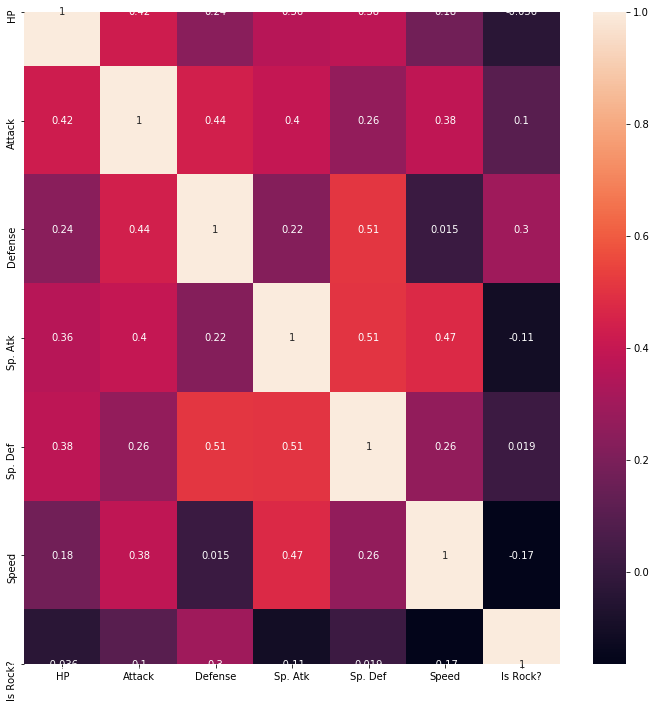

In [132]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True) # df.corr() makes a correlation matrix, sns.heatmap creates heatmap of values
plt.show()

Correlation heatmap can show us how much each of the attribute of pokemon correlatos to its type. We can observe that rock pokemon tend to be slower and have lower Sp. Atk. On the other hand they have big resistance to physical attacks.

### Checking class distribution

In [133]:
num_obs = len(df)
num_true = len(df.loc[df["Is Rock?"] == 1])
num_false = len(df.loc[df["Is Rock?"] == 0])
print("Number of rock type pokemon:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of non-rock type pokemon: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of rock type pokemon:  58 (7.25%)
Number of non-rock type pokemon: 742 (92.75%)


7.25% is quite rare event that might be hard to predict, especially in dataset that has around 800 pokemon.

# Machine learning
## Spliting data

I am splitting data 70% for training purposes and 30% for test purposes. I also set seed to make sure that % of rock pokemon in both sets are roughly equal.

In [134]:
from sklearn.model_selection import train_test_split
feature_col_names = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
predicted_class_names = ["Is Rock?"]

X = df[feature_col_names].values     # predictor feature columns (6 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=240, random_state=103) 

In [135]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df["Is Rock?"] == 1]), (len(df.loc[df["Is Rock?"] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df["Is Rock?"] == 0]), (len(df.loc[df["Is Rock?"] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 58 (7.25%)
Original False : 742 (92.75%)

Training True  : 40 (7.14%)
Training False : 520 (92.86%)

Test True      : 18 (7.50%)
Test False     : 222 (92.50%)


# Naive Bayes

In [136]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

## Performance on Training Data

In [137]:
from sklearn import metrics

# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.9214



## Performance on Testing Data

In [138]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.9375


## Metrics

In [139]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[221   1]
 [ 14   4]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       222
           1       0.80      0.22      0.35        18

    accuracy                           0.94       240
   macro avg       0.87      0.61      0.66       240
weighted avg       0.93      0.94      0.92       240



In metrics we can observe 4 true positives with 1 false positive. However 14 out of 18 rock pokemon in training set has not been classified correctly. Recall score is 0.22, which is not great.

# Random Forest

In [140]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=103, n_estimators=10)      # Create random forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=103,
                       verbose=0, warm_start=False)

## Performance on Training Data

In [141]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9893


## Performance on Testing Data

In [142]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.9333


## Metrics

In [143]:
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[221   1]
 [ 15   3]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       222
           1       0.75      0.17      0.27        18

    accuracy                           0.93       240
   macro avg       0.84      0.58      0.62       240
weighted avg       0.92      0.93      0.91       240



Random forrest is even worse than Naive Bayes wiht only 3 true positives and recall score of 0.17.

## Logistic Regression

In [163]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(C=0.1, class_weight="balanced", random_state=103, solver='liblinear', max_iter=10000)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7625
[[168  54]
 [  3  15]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.76      0.85       222
           1       0.22      0.83      0.34        18

    accuracy                           0.76       240
   macro avg       0.60      0.80      0.60       240
weighted avg       0.93      0.76      0.82       240



1st max value of 0.111 occured at C=0.100


Text(0, 0.5, 'recall score')

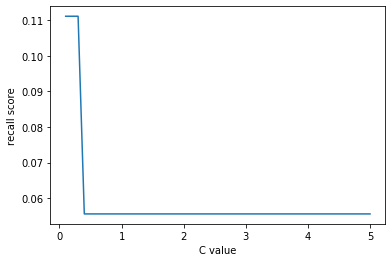

In [166]:
# Setting regularization parameter
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=103, solver='liblinear')
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

1st max value of 0.833 occured at C=0.100


Text(0, 0.5, 'recall score')

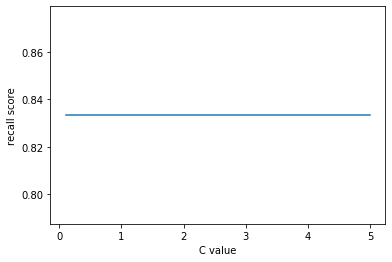

In [165]:

C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=103, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

After some testing the best recall score obtained was 0.833. However with 15 pokemon well classified I've obtained 54 false positives.

## Logistic Regression cross-validation (k-fold)

In [169]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=103, Cs=3, cv=10, refit=False, class_weight="balanced", max_iter=10000, solver='liblinear')  # set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=10000, multi_class='warn', n_jobs=-1,
                     penalty='l2', random_state=103, refit=False, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

In [170]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.7625
[[168  54]
 [  3  15]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.76      0.85       222
           1       0.22      0.83      0.34        18

    accuracy                           0.76       240
   macro avg       0.60      0.80      0.60       240
weighted avg       0.93      0.76      0.82       240



Again, 15 true positive, 54 false positive. 3 Rock pokemon were missed. This seems to be best fit so far.

## Additional visualisation

To better understand what is happening and why I am getting this result I've decided to reduce dimensionality and plot rock pokemon with **red** and other pokemon with **blue** colour.

In [149]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA(n_components=2, whiten=True).fit(df[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]) #This line creates model. 'Whiten=True' means that we're normalizing data
df_pca = pca.transform(df[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]) #This line uses model to transform data into 2 dimensions
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.46096131 0.18752145]
0.6484827653819593


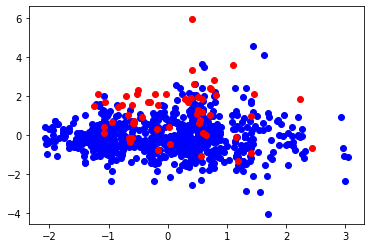

In [150]:
is_rock = ['Not a rock', 'Rock']
is_rock_id = np.array(df["Is Rock?"])

row = 0
col = 1

plt.scatter(df_pca[:,row][is_rock_id==0],df_pca[:,col][is_rock_id==0],c='b')
plt.scatter(df_pca[:,row][is_rock_id==1],df_pca[:,col][is_rock_id==1],c='r')


plt.show()

We can observe that rock pokemon have no distinct pattern and cannot be seen easily with naked eye on scatter plot.

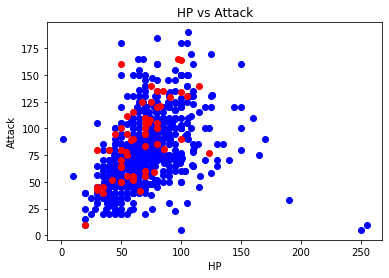

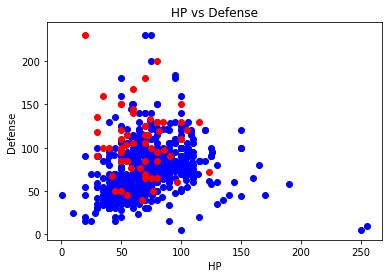

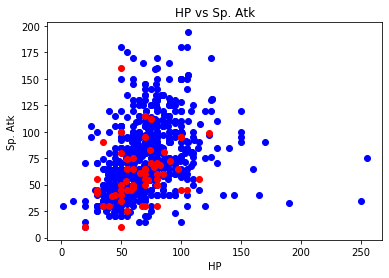

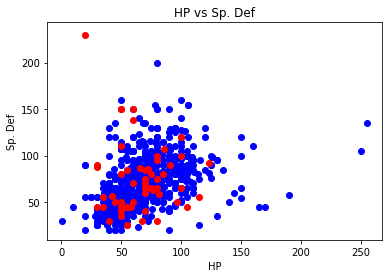

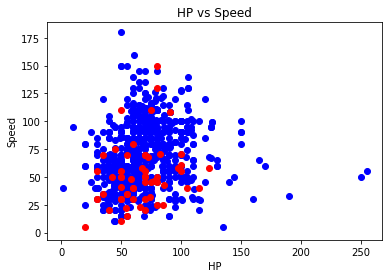

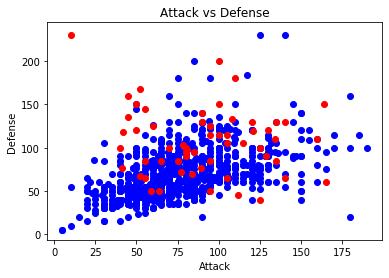

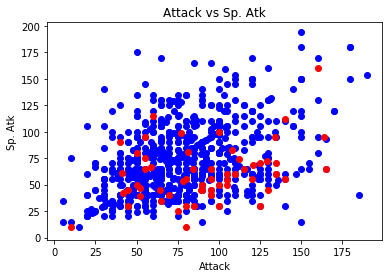

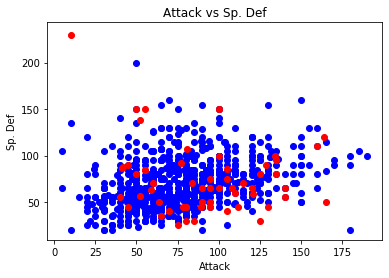

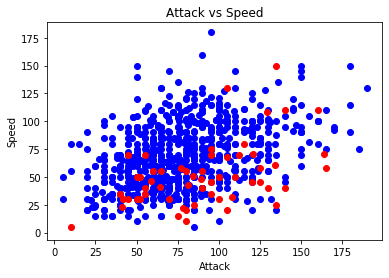

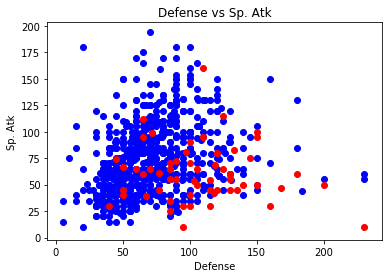

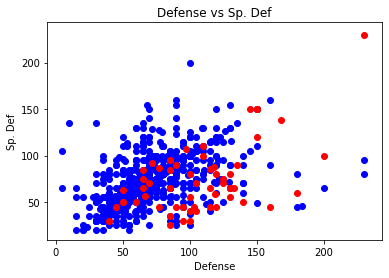

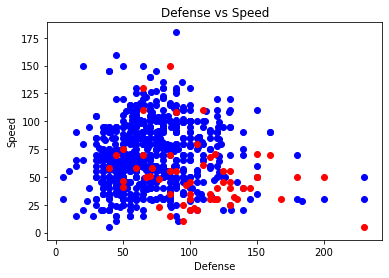

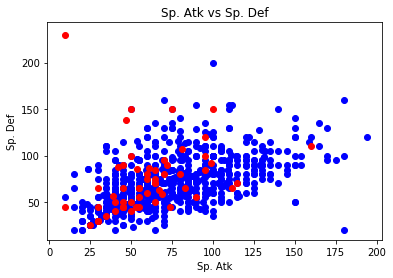

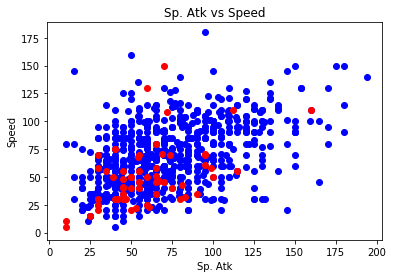

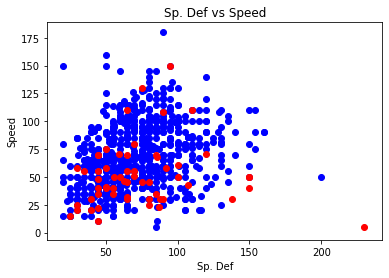

In [172]:
def get_combinations(columns):
    combinations = list()
    for i in range(0, len(columns)):
        for j in range(i+1,len(columns)):
            combinations.append([columns[i],columns[j]])
    return combinations

columns_combinations = get_combinations(list(df.columns[:-1]))

for combination in columns_combinations:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df[combination[0]][is_rock_id==0],df[combination[1]][is_rock_id==0],c='b')
    ax.scatter(df[combination[0]][is_rock_id==1],df[combination[1]][is_rock_id==1],c='r')
    ax.set_xlabel(combination[0])
    ax.set_ylabel(combination[1])
    ax.set_title("{} vs {}".format(combination[0], combination[1]))

    plt.show()

I've plotted every combination of two stats to see wheter any patterns exist. As we can observe, due to big spread of rock pokemon in stats it is very hard to distinguish them. Therefore it is very challenging task to use machine learning algorithms to well.

# Conclusion

Due to huge spread of stats in pokemon it is very difficult to categorize them based on that. Rock Pokemon are characterized by high durability, a lot of HP and low speed. Unfortunately, they share many similar statistics with steel and ground pokemon. The creators of the game also had to take into account the balance - so the statistics are not compatible for every type of pokemon. To ensure a good time in the game, many types need their tanks.

Additionally it has been challenging to work with so little data and so unbalanced dataset. However when it comes to predicting pokemon, I've missed only 3 out of 18 rock pokemon in testing dataset (with large portion of false positives).